<a href="https://colab.research.google.com/github/Iamnetis/UMSL-AI/blob/main/Linear_regression_with_two_input_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima-diabetes.csv to pima-diabetes.csv


In [ ]:
import pandas as pd
data = pd.read_csv('pima-diabetes.csv', delimiter =',')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
dataset= np.genfromtxt('pima-diabetes.csv', delimiter=',', skip_header = True, usecols = (2, 5, 7))

In [ ]:
dataset

array([[72. , 33.6, 50. ],
       [66. , 26.6, 31. ],
       [64. , 23.3, 32. ],
       ...,
       [72. , 26.2, 30. ],
       [60. , 30.1, 47. ],
       [70. , 30.4, 23. ]])

In [ ]:
print (dataset.shape)

(768, 3)


In [ ]:
print (dataset[0:5])

[[72.  33.6 50. ]
 [66.  26.6 31. ]
 [64.  23.3 32. ]
 [66.  28.1 21. ]
 [40.  43.1 33. ]]


In [ ]:
import plotly.express as px
import pandas as pd
d = {'BloodPressure': dataset[:, 0], 'BMI': dataset[:, 1], 'Age': dataset[:, 2]}
df = pd.DataFrame(data=d)

In [ ]:
fig = px.scatter_3d(df,
                    x = 'BloodPressure',
                    y = 'BMI',
                    z = 'Age', opacity = 0.6)
fig.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 2, activation = 'linear'))

In [ ]:
model.compile(loss = 'mse', optimizer='rmsprop', metrics=['mse'])
model.fit(dataset[:, 0:2], dataset[:, 2], epochs = 256, verbose= 1)

Epoch 1/256
24/24 [==============================] - 0s 868us/step - loss: 146.0387 - mse: 146.0387
Epoch 2/256
24/24 [==============================] - 0s 790us/step - loss: 146.0061 - mse: 146.0061
Epoch 3/256
24/24 [==============================] - 0s 908us/step - loss: 145.8994 - mse: 145.8994
Epoch 4/256
24/24 [==============================] - 0s 879us/step - loss: 145.8885 - mse: 145.8885
Epoch 5/256
24/24 [==============================] - 0s 944us/step - loss: 145.8607 - mse: 145.8607
Epoch 6/256
24/24 [==============================] - 0s 933us/step - loss: 145.8604 - mse: 145.8604
Epoch 7/256
24/24 [==============================] - 0s 905us/step - loss: 145.8678 - mse: 145.8678
Epoch 8/256
24/24 [==============================] - 0s 952us/step - loss: 145.8329 - mse: 145.8329
Epoch 9/256
24/24 [==============================] - 0s 862us/step - loss: 145.8517 - mse: 145.8517
Epoch 10/256
24/24 [==============================] - 0s 945us/step - loss: 145.7959 - mse: 145.7959

In [ ]:
print ('Model weights(w0, w1 and bias):')
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print (w0)
print(w1)
print(b0)

Model weights(w0, w1 and bias):
[0.2481101]
[0.25618052]
[7.0277863]


In [ ]:
np.set_printoptions(precision=2)
print('True Validation Data:')
print (dataset[:10, 2])
prediction = model.predict(dataset[:, 0:2])
print('Prediction: ')
print(prediction[0:5].T)


True Validation Data:
[50. 31. 32. 21. 33. 30. 26. 29. 53. 54.]
Prediction: 
[[33.5  30.22 28.88 30.6  27.99]]


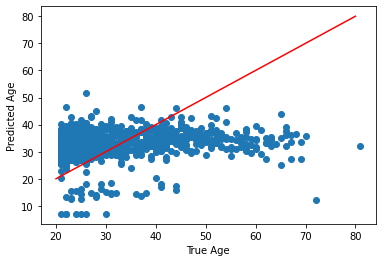

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataset[:, 2], prediction)
plt.ylabel('Predicted Age')
plt.xlabel('True Age')
plt.plot([20, 80], [20, 80], color = 'red')
plt.show()